In [59]:
from google.colab import auth
from google.auth import default
import gspread
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Authenticate
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [60]:
sheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1DrzAzEGT70O45KKXulY6DwGdorkiAFfjb6MCnyNsnAg/edit").worksheet("Form Responses 1")

# Convert to pandas DataFrame
data = sheet.get_all_records()
df = pd.DataFrame(data)

df

,Timestamp,sessionID,segmentType,surfaceType,eventType,playerSpeed,headlightIntensityEntry,headlightRangeEntry,driftUsedEntry,Column 8
0,10/22/2025 16:10:26,6.389675e+17,30L,Normal,crash,124.07,,,,
1,10/23/2025 21:57:03,6.389685e+17,30L,Wet,crash,139.12,,,,
2,10/22/2025 14:21:02,6.389674e+17,30R,Normal,crash,97.37,,,,
3,10/23/2025 22:00:40,6.389685e+17,30R,Wet,crash,187.75,,,,
4,10/24/2025 11:39:56,6.389690e+17,30R,Normal,crash,83.84,,,,
...,...,...,...,...,...,...,...,...,...,...
711,11/6/2025 23:48:05,6.389807e+17,45L,Normal,crash,197.24,160,80,FALSE,
712,11/6/2025 23:52:49,6.389807e+17,Straight,Normal,crash,219.81,100,50,FALSE,
713,11/6/2025 23:56:10,6.389807e+17,90R,Normal,crash,112.30,180,90,FALSE,
714,11/6/2025 23:56:19,6.389807e+17,90R,Normal,crash,137.03,200,100,FALSE,


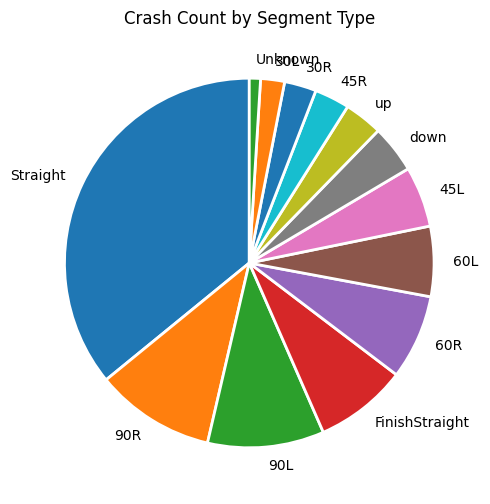

,count
segmentType,
Straight,257
90R,75
90L,73
FinishStraight,58
60R,53
60L,44
45L,38
down,30
up,24


In [61]:
#Crash count by segment type
segment_counts = df['segmentType'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(segment_counts, labels=segment_counts.index,
        startangle=90,
        wedgeprops={'edgecolor': 'white', 'linewidth': 2})
plt.title('Crash Count by Segment Type')
plt.show()

segment_counts

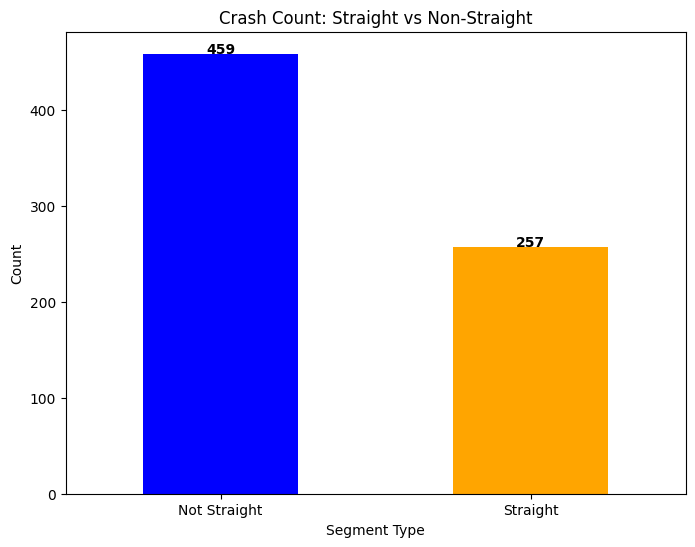

In [62]:
#crash count by Straight vs non straight

df['segment_category'] = df['segmentType'].apply(lambda x: 'Straight' if x == 'Straight' else 'Not Straight')

segment_counts = df['segment_category'].value_counts()

plt.figure(figsize=(8, 6))
ax = segment_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Crash Count: Straight vs Non-Straight')
plt.xlabel('Segment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

for i, v in enumerate(segment_counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.show()

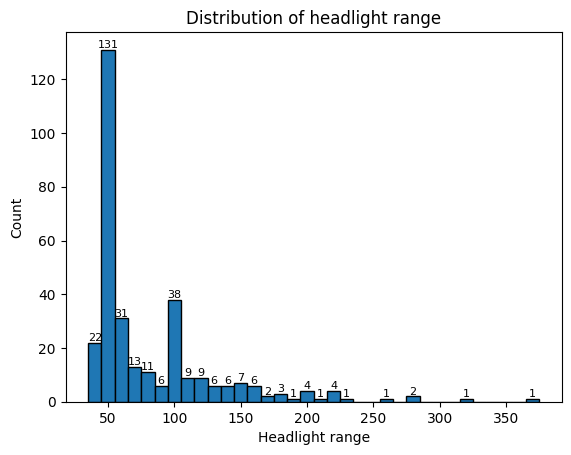

In [63]:
# Crash Count: Using Drift vs Not Using Dirft
# convert to numeric
values = pd.to_numeric(df['headlightRangeEntry'], errors='coerce').dropna()

min_val = int(values.min())
max_val = int(values.max())

# one bin per multiple of 10
bins = np.arange(min_val - 5, max_val + 6, 10)

plt.figure()
n, bins, patches = plt.hist(values, bins=bins, edgecolor='black', linewidth=1)
plt.title('Distribution of headlight range')
plt.xlabel('Headlight range')
plt.ylabel('Count')

# numbers on top
for count, patch in zip(n, patches):
    if count == 0:
        continue
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    plt.text(x, y, int(count), ha='center', va='bottom', fontsize=8)

plt.show()


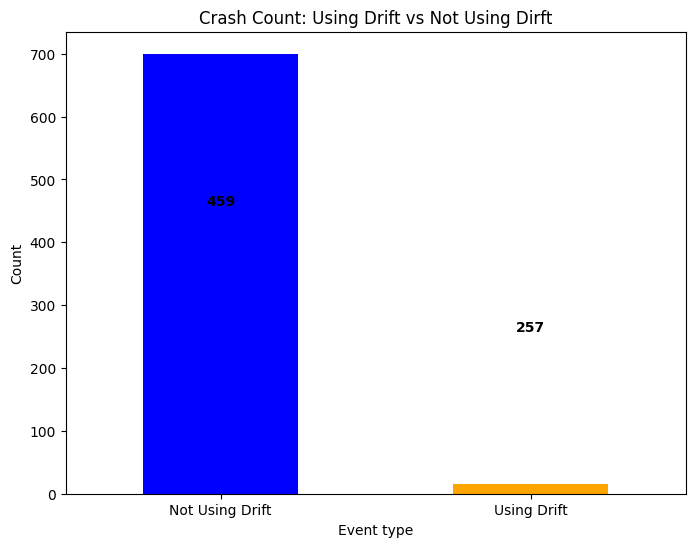

In [64]:
# Crash Count: Using Drift vs Not Using Dirft
df['drift_usage'] = df['driftUsedEntry'].apply(lambda x: 'Using Drift' if x == 'TRUE' else 'Not Using Drift')

drift_counts = df['drift_usage'].value_counts()

plt.figure(figsize=(8, 6))
ax = drift_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Crash Count: Using Drift vs Not Using Dirft')
plt.xlabel('Event type')
plt.ylabel('Count')
plt.xticks(rotation=0)

for i, v in enumerate(segment_counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.show()

In [65]:
# For player's game progress track

sheet2 = gc.open_by_url("https://docs.google.com/spreadsheets/d/1BwtZKinz0BMmnY13MDYl772gbJZwP92jXU_eX3DTaNU/edit").worksheet("Form Responses 1")

# Convert to pandas DataFrame
data = sheet2.get_all_records()
df = pd.DataFrame(data)

df

,Timestamp,sessionIDEntry,eventTypeEntry,completionTimeEntry,progressPercentageEntry,crashCountEntry
0,10/31/2025 14:08:22,6.389750e+17,race_complete,199.16,100,2
1,10/31/2025 14:08:30,6.389750e+17,race_complete,207.59,100,2
2,10/31/2025 14:10:47,6.389750e+17,race_complete,130.15,100,1
3,10/31/2025 14:14:55,6.389750e+17,race_complete,140.90,100,10
4,10/31/2025 14:17:13,6.389750e+17,dropout,123.84,0,9
5,10/31/2025 14:22:34,6.389750e+17,race_complete,187.44,100,2
6,10/31/2025 14:24:45,6.389750e+17,race_complete,106.86,100,2
7,10/31/2025 15:25:28,6.389750e+17,race_complete,140.84,100,1
8,10/31/2025 15:28:16,6.389750e+17,race_complete,156.50,100,0
9,11/4/2025 11:52:11,6.389790e+17,race_complete,117.20,100,0


In [66]:
# Completed vs dropout
df['is_complete'] = df['eventTypeEntry'] == 'race_complete'

# Early dropout = dropout before 50% progress
df['early_dropout'] = (df['eventTypeEntry'] == 'dropout') & (df['progressPercentageEntry'] < 50)

# Keep only finished races when analyzing completion times
finished = df[df['is_complete']].copy()


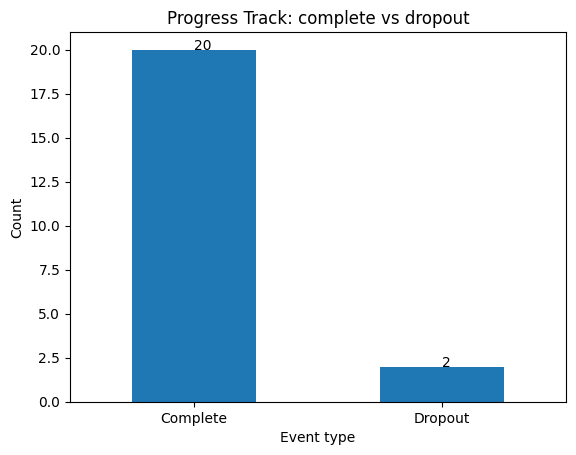

In [67]:
# Count for romplete vs dropout
plt.figure()
ax = df['eventTypeEntry'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',           # text
        (p.get_x() + p.get_width()/2,       # x position
         p.get_height()),                   # y position
    )
plt.title('Progress Track: complete vs dropout')
plt.xticks([0,1], ['Complete', 'Dropout'], rotation=0)
plt.xlabel('Event type')
plt.ylabel('Count')
plt.show()


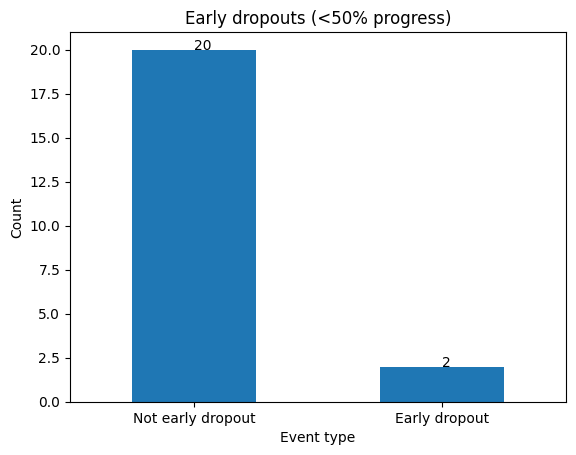

In [68]:
# Dropout: early dropout vs late dropout
plt.figure()
ax = df['early_dropout'].value_counts().plot(kind='bar')

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',           # text
        (p.get_x() + p.get_width()/2,       # x position
         p.get_height()),                   # y position
    )
plt.title('Early dropouts (<50% progress)')
plt.xticks([0,1], ['Not early dropout', 'Early dropout'], rotation=0)
plt.ylabel('Count')
plt.xlabel('Event type')
plt.show()

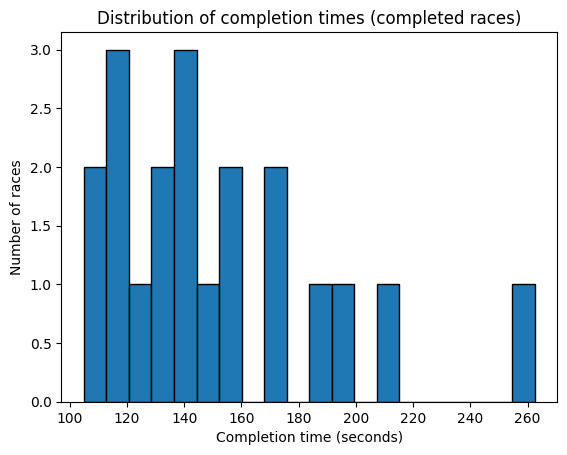

In [69]:
#completion time count

plt.figure()
plt.hist(finished['completionTimeEntry'], edgecolor='black', bins=20)
plt.title('Distribution of completion times (completed races)')
plt.xlabel('Completion time (seconds)')
plt.ylabel('Number of races')
plt.show()


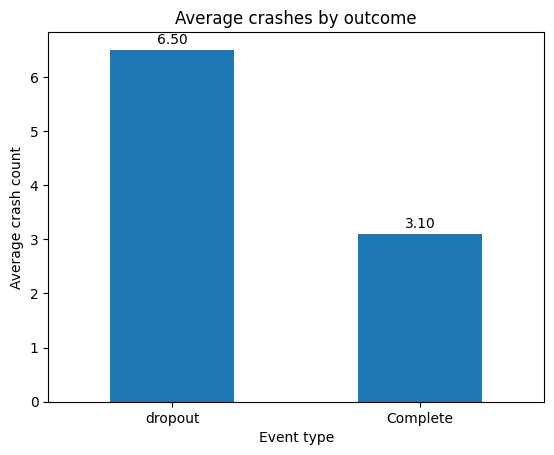

In [70]:
# dropout/complete vs avg. crash count

crash_by_outcome = df.groupby('eventTypeEntry')['crashCountEntry'].mean()

ax = crash_by_outcome.plot(kind='bar')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10,
                xytext=(0, 2), textcoords='offset points')
plt.title('Average crashes by outcome')
plt.ylabel('Average crash count')
plt.xlabel('Event type')
plt.xticks([0,1], ['dropout', 'Complete'], rotation=0)

plt.show()